# Lessons 23 and 24: Practice with Numpy and Matplotlib *solution*

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l23-24_practice_with_numpy_2_solution.ipynb).*

In [1]:
import numpy as np
import scipy.stats

import bootcamp_utils

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Practice 1: Axes with logarithmic scale

Sometimes you need to plot your data with a logarithmic scale. As an example, let's consider the classic genetic switch engineered by Jim Collins and coworkers ([Gardner, et al., *Nature*, **403**, 339, 2000](http://www.nature.com/nature/journal/v403/n6767/full/403339a0.html)). This genetic switch was incorporated into *E. coli* and is inducible by adjusting the concentration of the lactose analog IPTG. The readout is the fluorescence intensity of GFP.

Let's load in some data that have the IPTG concentrations and GFP fluorescence intensity. The data are in the file `~/git/data/collins_switch.csv`. Let's look at it.

In [2]:
!cat data/collins_switch.csv

# Data digitized from Fig. 5a of Gardner, et al., *Nature*, **403**, 339, 2000. The last column gives the standard error of the mean normalized GFP intensity.
iptg (mM),normalized gfp expression,sem
0.001000,0.004090,0.003475
0.010000,0.010225,0.002268
0.020000,0.022495,0.004781
0.030000,0.034765,0.003000
0.040000,0.067485,0.006604
0.040000,0.668712,0.087862
0.060000,0.740286,0.045853
0.100000,0.840491,0.058986
0.300000,0.936605,0.026931
0.600000,0.961145,0.093553
1.000000,0.940695,0.037624
3.000000,0.852761,0.059035
6.000000,0.910020,0.051052
10.000000,0.893661,0.042773


It has two rows of non-data. Then, Column 1 is the IPTG concentration, column 2 is the normalized GFP expression level, and the last column is the standard error of the mean normalized GFP intensity. This gives the error bars, which we will look at in the next exercise. For now, we will just plot IPTG versus normalized GFP intensity.

In looking at the data set, note that there are two entries for [IPTG] = 0.04 mM. At this concentration, the switch happens, and there are two populations of cells, one with high expression of GFP and one with low. The two data points represent these two populations of cells.

Now, let's make a plot of IPTG versus GFP.

>1. Load in the data set using `np.loadtxt()`. Be sure to use the `delimeter=','` and `skiprows=2` kwargs.
2. Slice column 0 out of the data and store it as `iptg`.
3. Slice column 1 of the data and store it as `gfp`.
4. Make a plot of normalized GFP intensity ($y$-axis) versus IPTG concentration ($y$-axis) using `plt.plot()`. These are data, so you should not make the plot as lines. Use the `marker='.'` and `linestyle='none'` kwargs.
5. Label your axes.

Now that you have done that, there are some problems with the plot. It is really hard to see the data points with low concentrations of IPTG. In fact, looking at the data set, the concentration of IPTG varies over four orders of magnitude. When you have data like this, it is wise to plot them on a logarithmic scale. There are three functions in `matplotlib.pyplot` that enable you to plot on a log scale.
* `plt.loglog()`: Both $x$ and $y$ axes are on a logarithmic scale.
* `plt.semilogx()`: Only the $x$ axis is on a logarithmic scale.
* `plt.semilogy()`: Only the $y$ axis is on a logarithmic scale.
For this data set, it is best to have the $x$ axis on a logarithmic scale. Remake the plot you just did with `plt.semilogx()`.

### Practice 1: solution

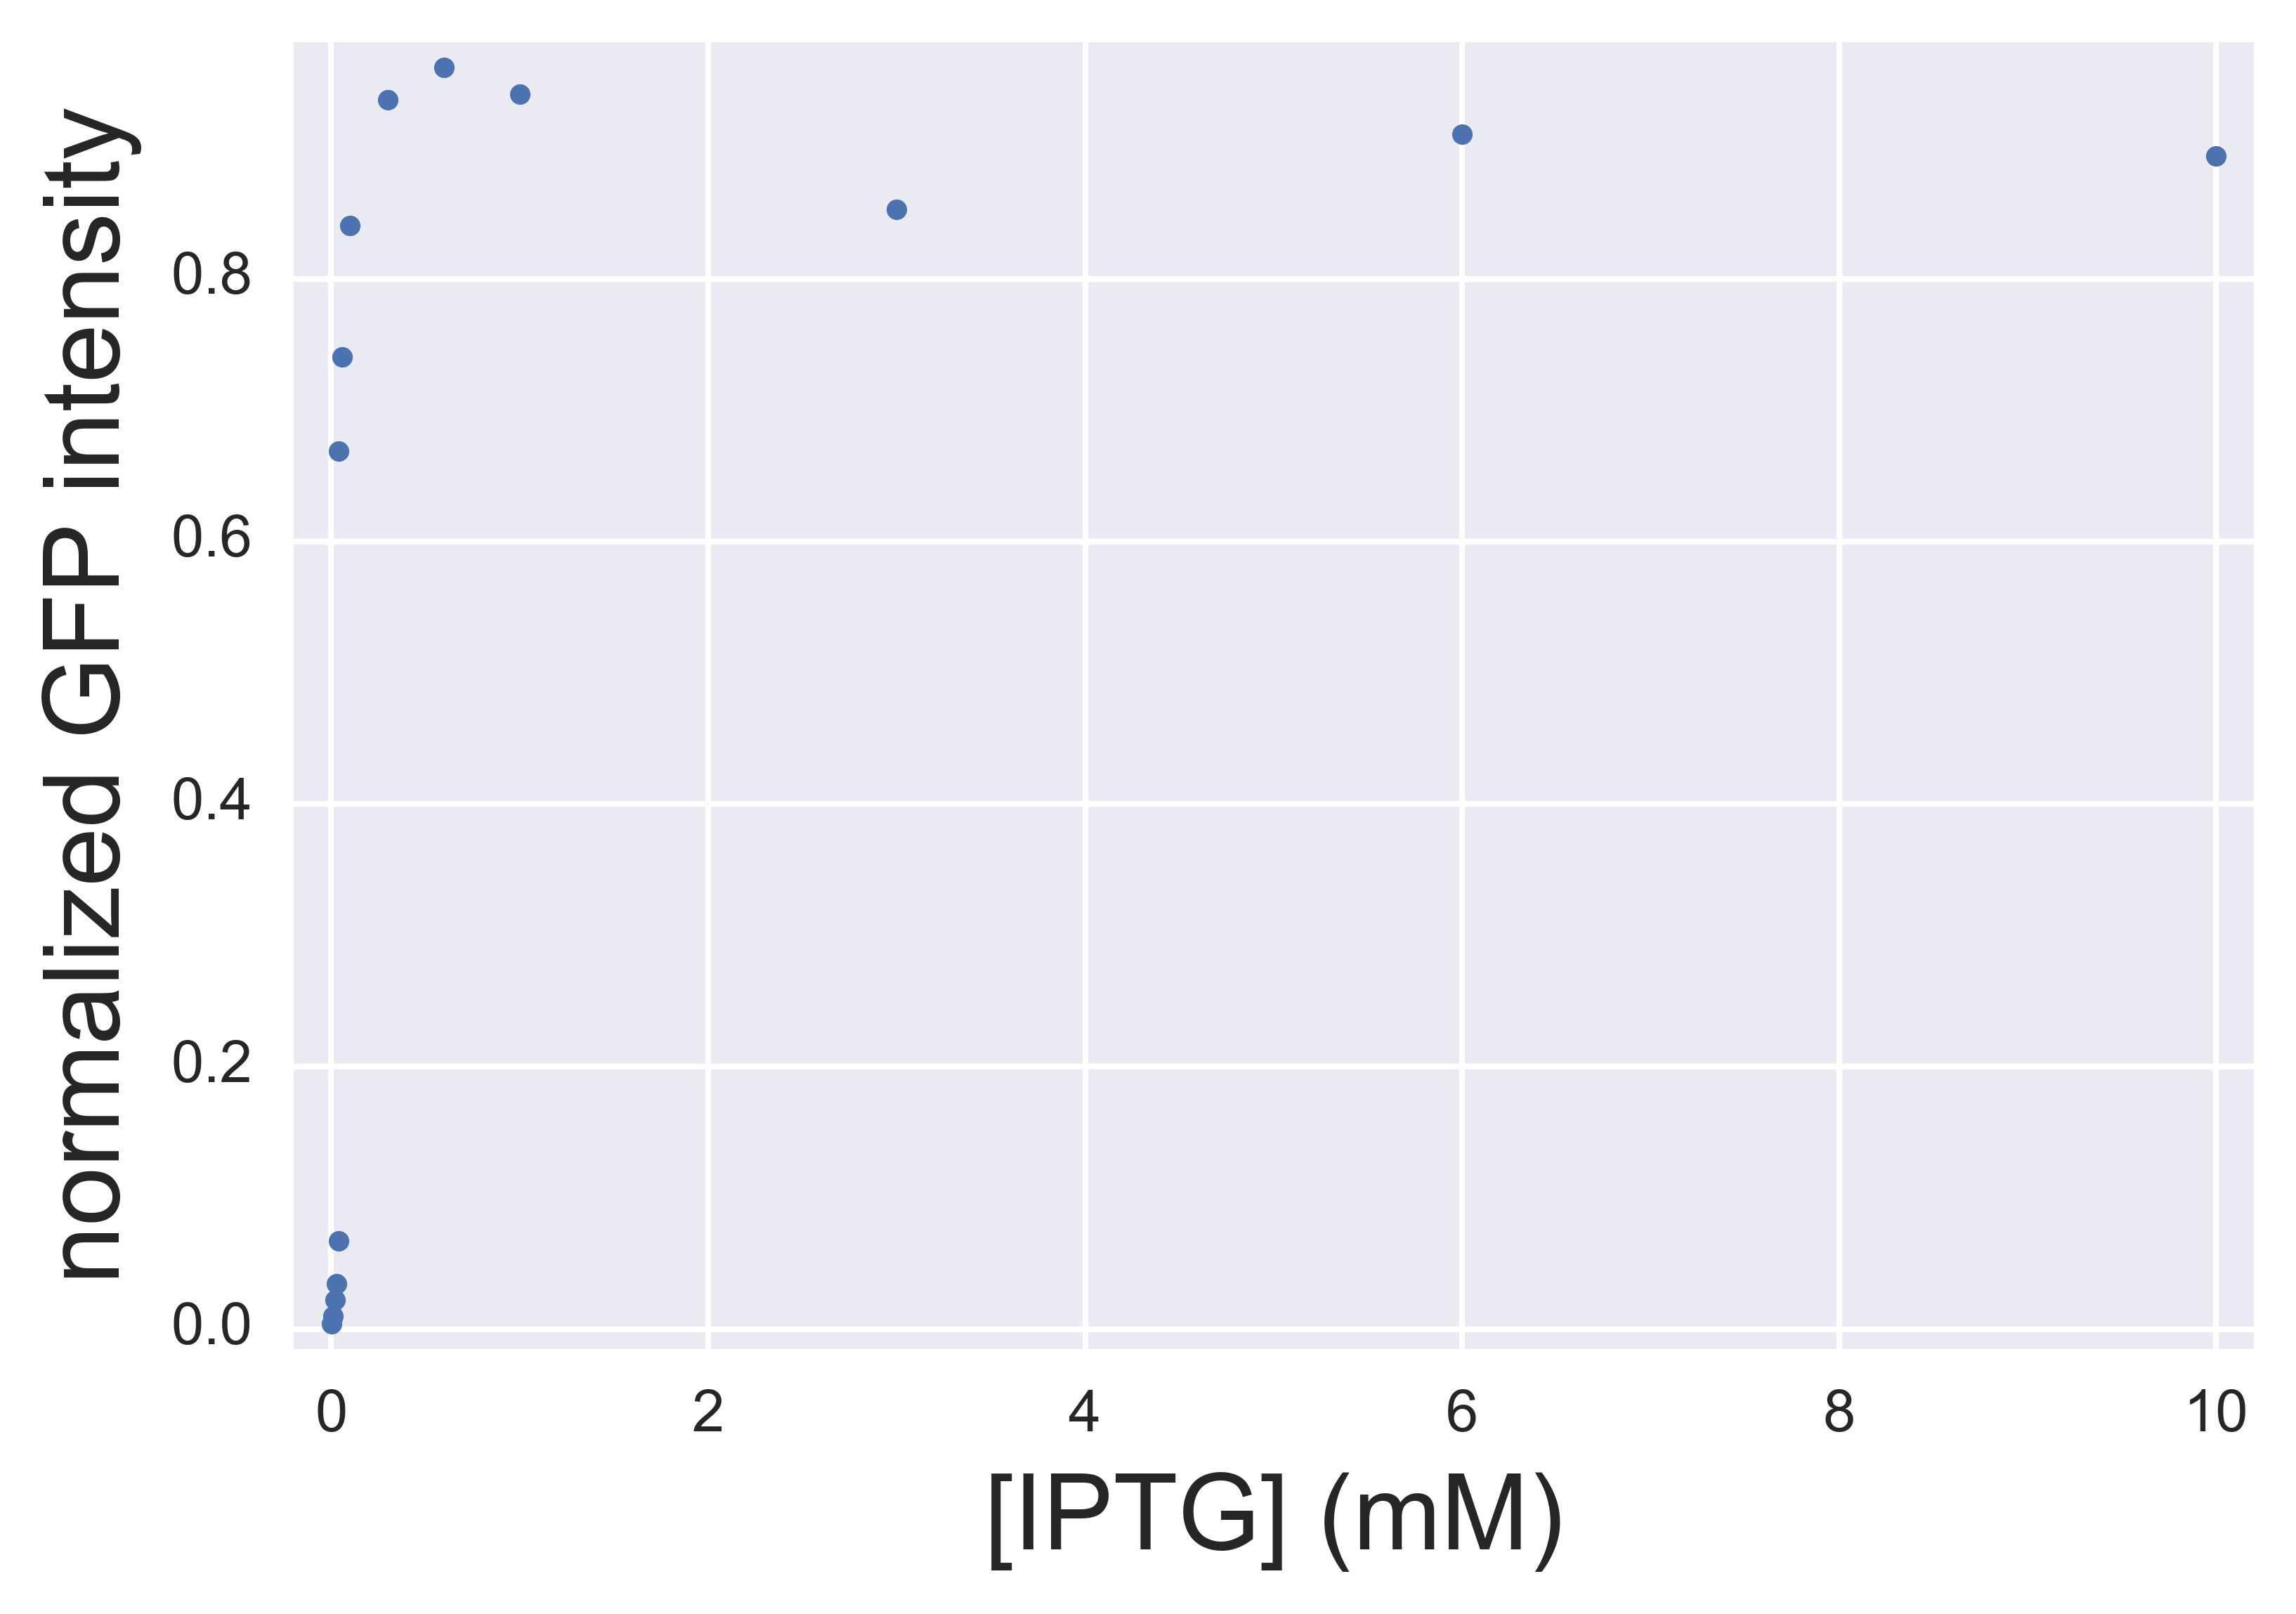

In [3]:
# Load in the data
data = np.loadtxt('data/collins_switch.csv', skiprows=2, delimiter=',')

# Slice out x and y values
iptg = data[:,0]
gfp = data[:,1]

# Make a plot with labeled axes, etc
plt.plot(iptg, gfp, marker='.', linestyle='none')
plt.xlabel('[IPTG] (mM)')
plt.ylabel('normalized GFP intensity')
plt.margins(0.02)

We clearly need the $x$-axis to be on a log scale, so let's remake the plot. `plt.margins()` has trouble with axes on a log scale, so we will hand-set the axis limits.

(0.0008, 15)

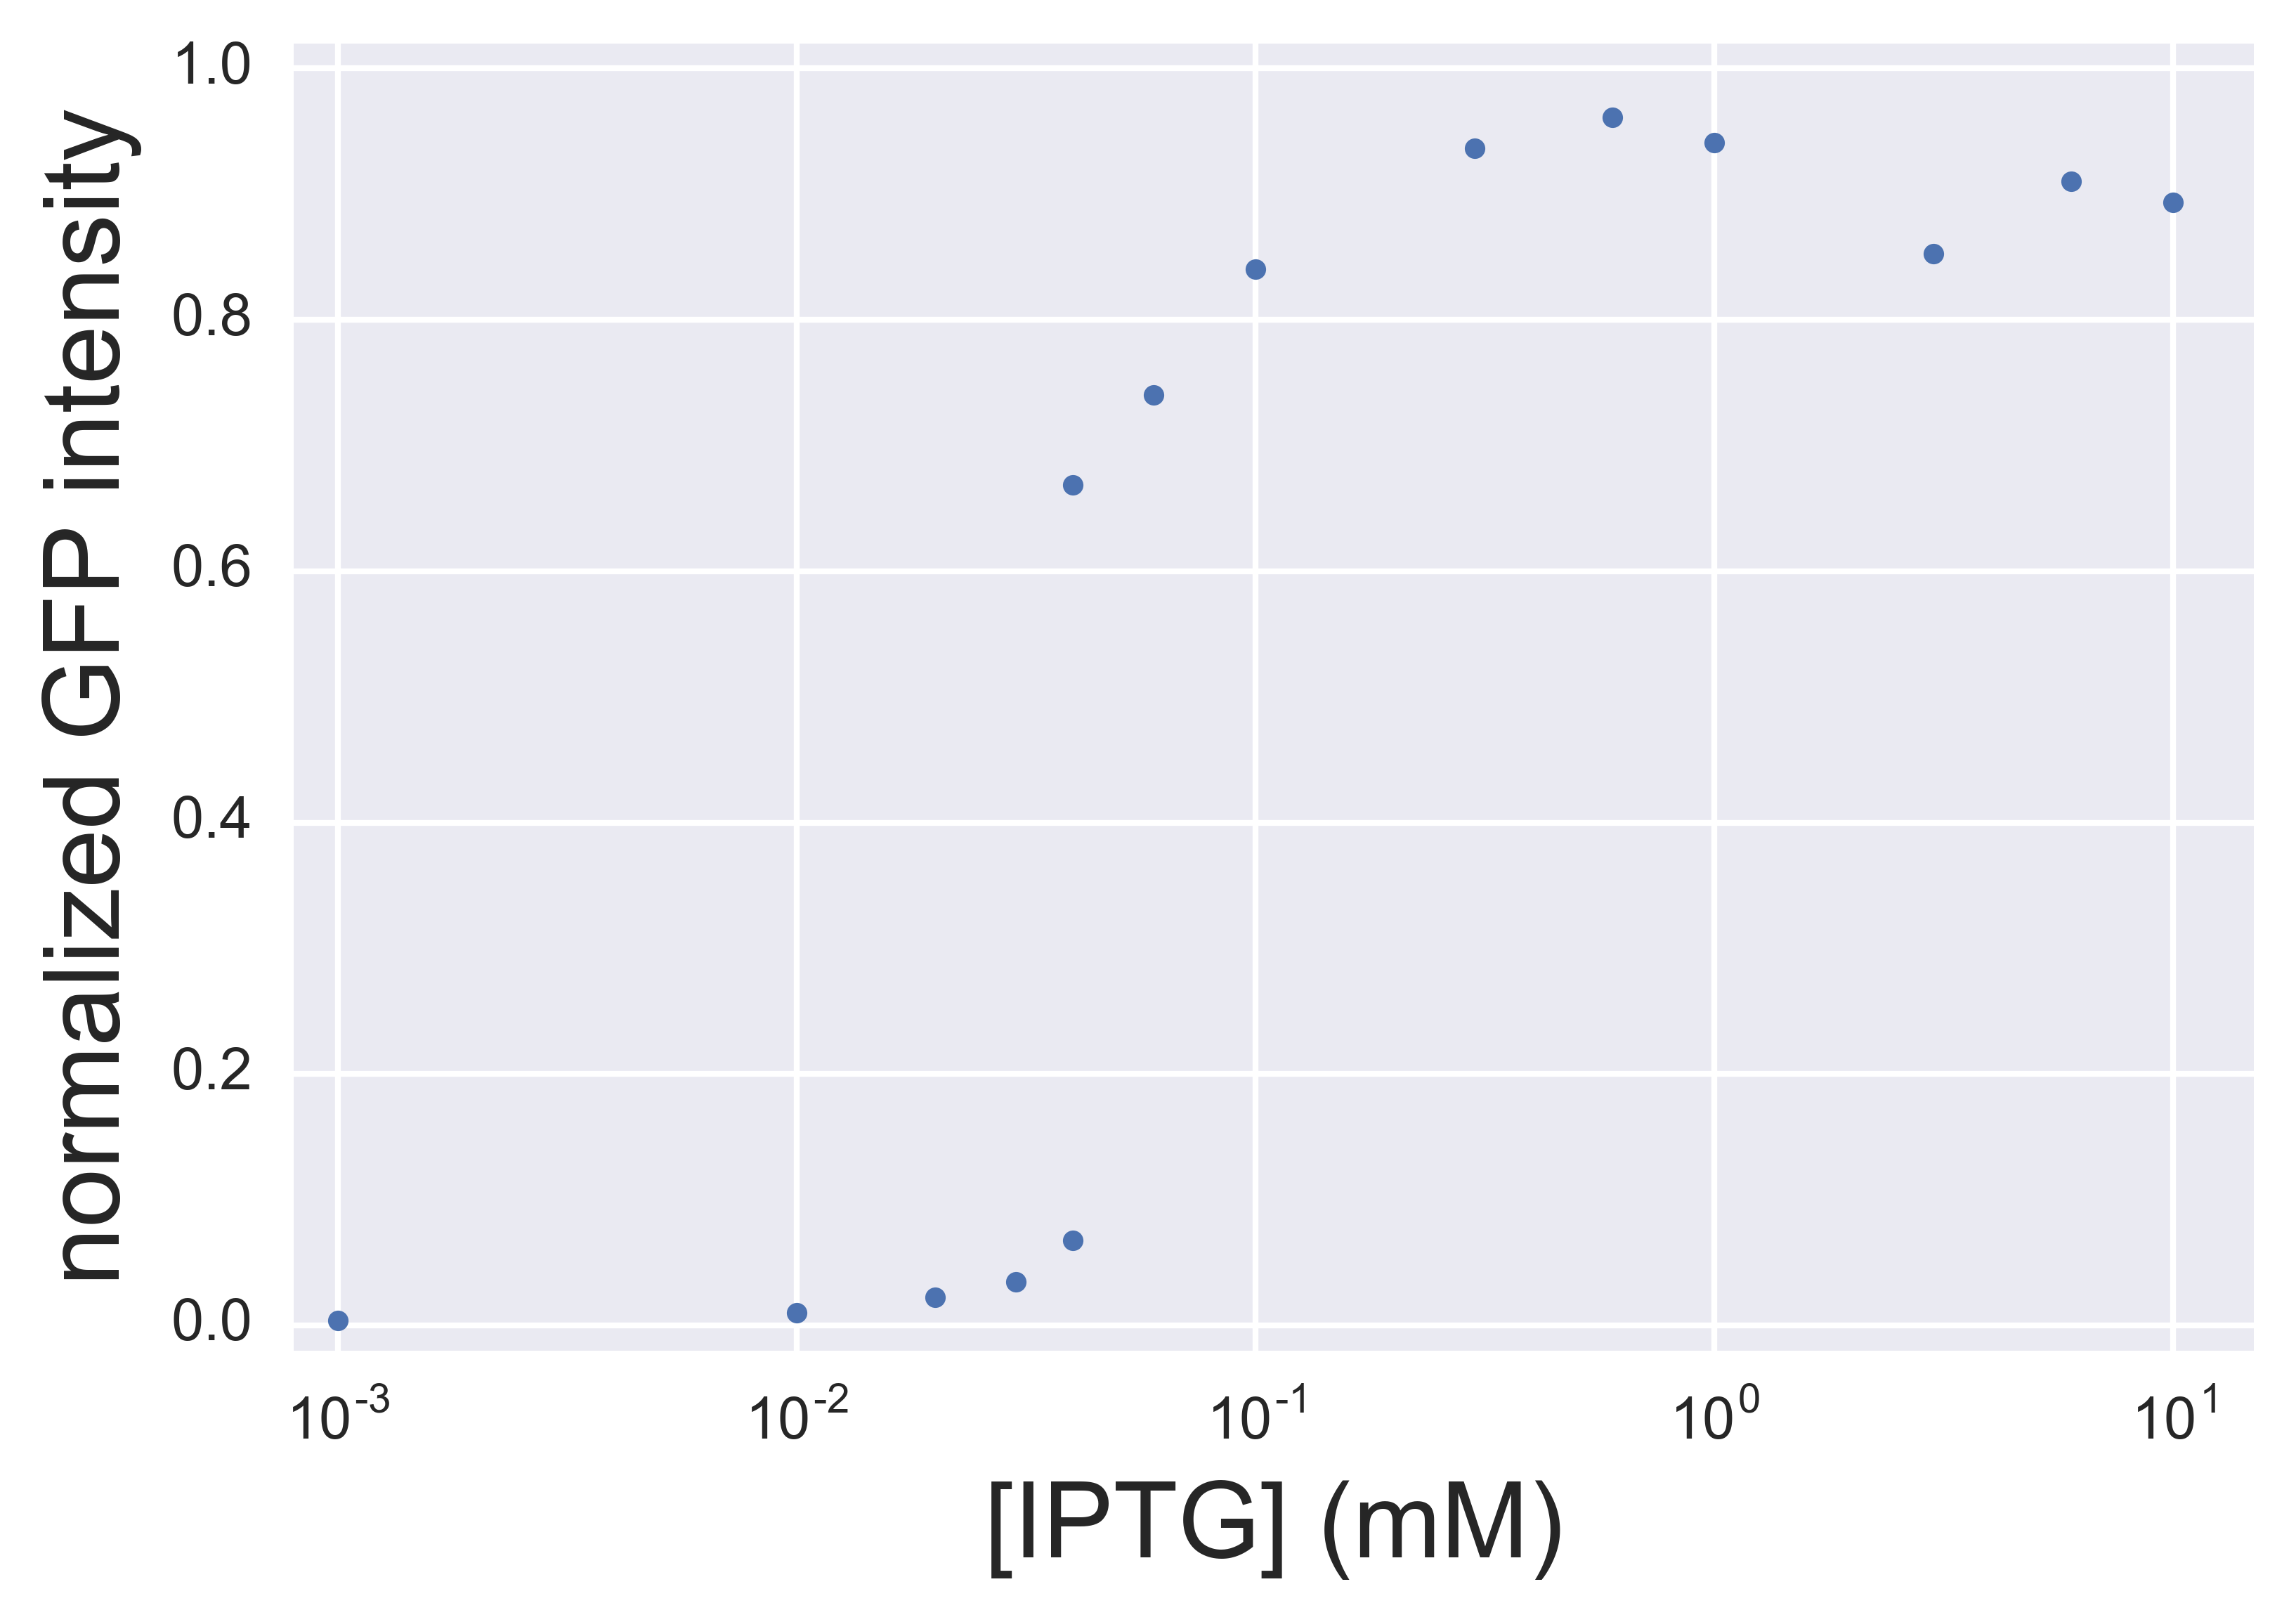

In [4]:
# Make a plot with labeled axes, etc
plt.semilogx(iptg, gfp, marker='.', linestyle='none')
plt.xlabel('[IPTG] (mM)')
plt.ylabel('normalized GFP intensity')
plt.ylim(-0.02, 1.02)
plt.xlim(8e-4, 15)

## Practice 2: Plots with error bars

The data set also contains the standard error of the mean, or SEM. The SEM is often displayed on plots as error bars. To make a plot with error bars, you can use the `plt.errorbar()` function.
>1. Read [the documentation of `plt.errorbar()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar).
2. Slice column 2 out of the Collins data set and store it as `sem`.
3. Make a plot of the genetic switch data using `plt.errorbar()` setting the kwarg `yerr=sem`. Be sure to be using Seaborn. The default Matplotlib error bar plots are dreadful.
4. Label your axes.

There is a problem with this plot; it does not have the $x$-axis on a logarithmic scale, and there is no way to set the scale to be logarithmic using the `plt.errorbar()` function. You can set a logarithmic scale after the plot is generated by doing

    plt.xscale('log')
    
After doing this, the plot looks much better.

There is also a problem with the GFP signals at low IPTG. The error bars are tiny, so it is hard to see the symbol. Now, play with different kwargs to make your error bar plot look the way you like. I recommend these kwargs:
* `linestyle='none'`
* `marker='.'`
* `markersize=10`


### Practice 2 solution

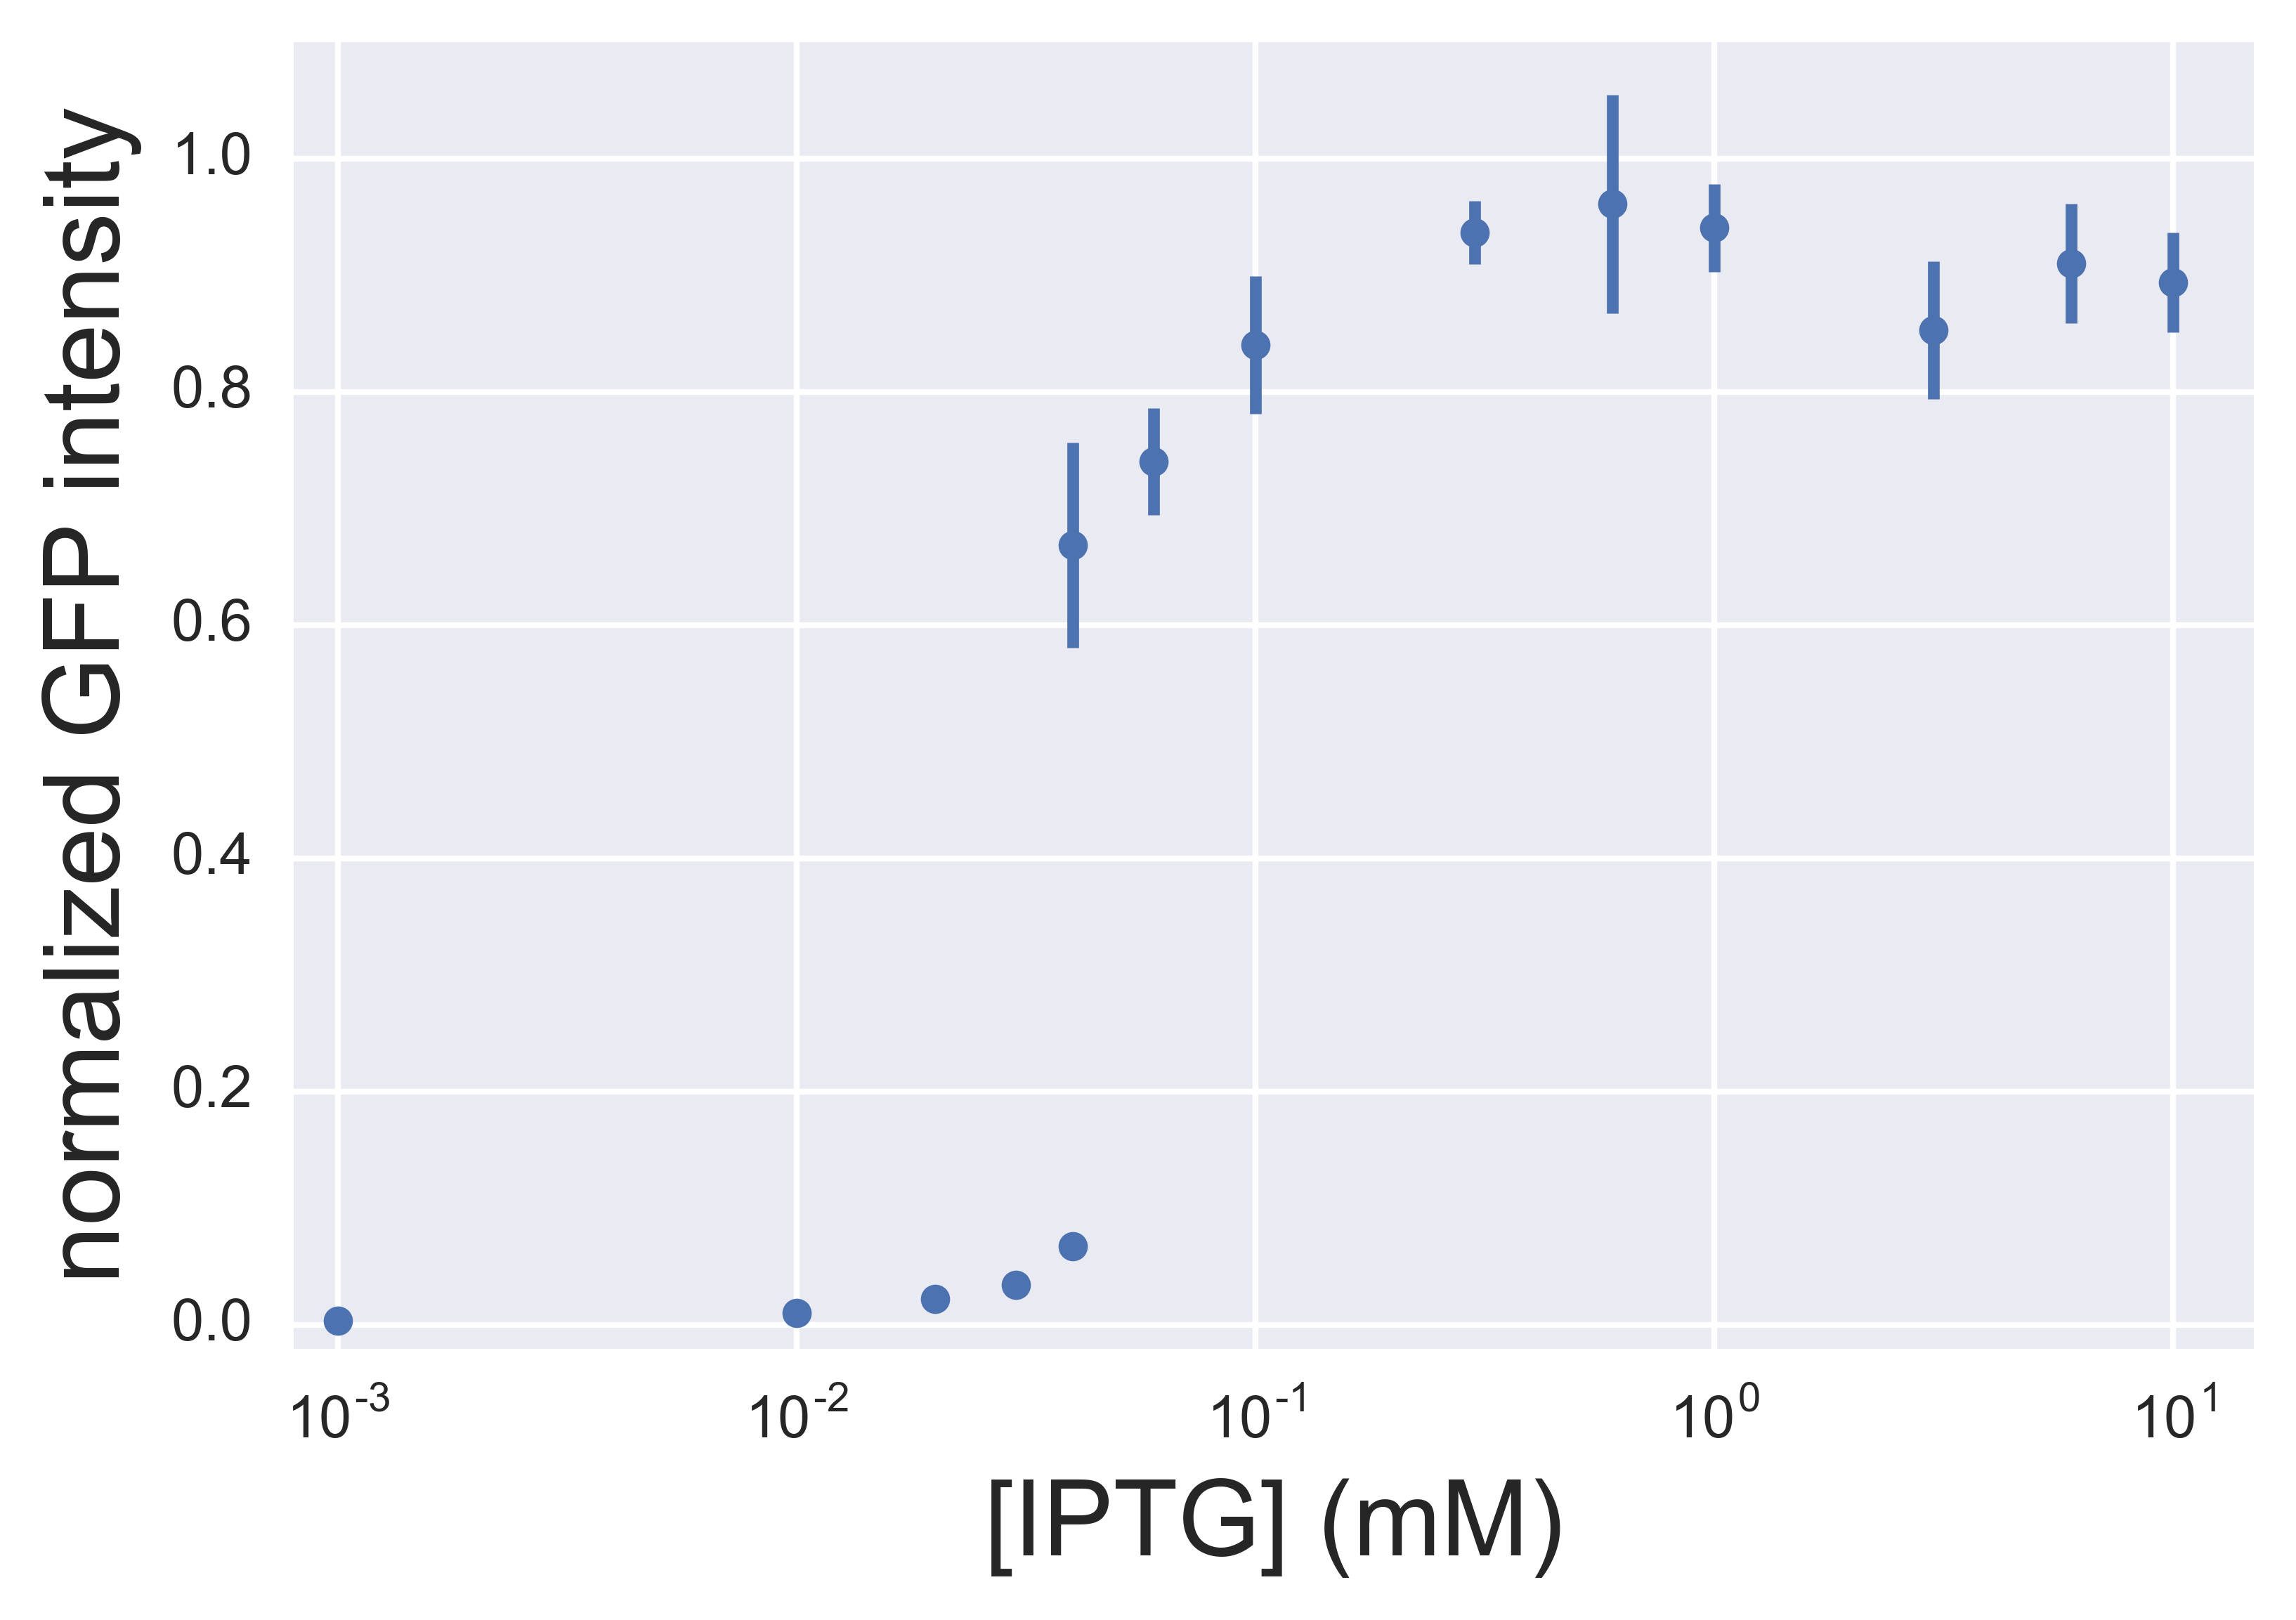

In [5]:
# Slide out S.E.M.
sem = data[:,2]

# Make error bar plot
plt.errorbar(iptg, gfp, yerr=sem, marker='.', markersize=10, linestyle='none')
plt.xlabel('[IPTG] (mM)')
plt.ylabel('normalized GFP intensity')
plt.ylim(-0.02, 1.1)
plt.xlim(8e-4, 15)

# Set log scale
plt.xscale('log')

## Practice 3: Computing and plotting a ECDFs

We plotted the measured cross-sectional areas of the *C. elegans* eggs from the Harvey and Orbidans paper as histograms. A histogram is a way of approximately representing the *probability distribution function*, or PDF, describing the data. The *cumulative distribution function*, or CDF, contains the same information as the PDF. It's just its integral. Importantly, we can plot the data to show what the CDF looks like, the so-called *empirical cumulative distribution function*, or ECDF, without the binning bias inherent in histograms.

To plot a cumulative histogram, the $x$-values are the sorted values of the array of data.  The values of the $y$ axis are $y_j = (j+1) / n$, where $n$ is the number of data points and $0 \le j \le n-1$.

>1. Write a function to compute the ECDF. The call signature is `ecdf(data)`. It returns the `x` and `y` values needed to plot the ECDF.
    * Compute `x` by sorting the array `data`.
    * Compute `y`. Think carefully about how to do this. The two functions you need are `np.arange()` and `len()`.
    * Return `x,y`.
2. Load in the data sets `xa_high_food.csv` and `xa_low_food.csv`.
3. Generate `x` and `y` values for the ECDFs for these data sets.
4. Plot the ECDFs got the high food and low food data as dots. That is, use the kwargs `marker='.'` and `linestyle='none'` when you call `plt.plot()`. Note that to add additional plots to a given figure, you just call `plt.plot()` again.
5. Be sure to label your axes. "ECDF" is a reasonable label for your $y$-axis.

I think far too few papers use ECDFs in displaying data. They are far better then histograms. I hope that now you have found them, you will use them in your own research.

### Practice 3: solution

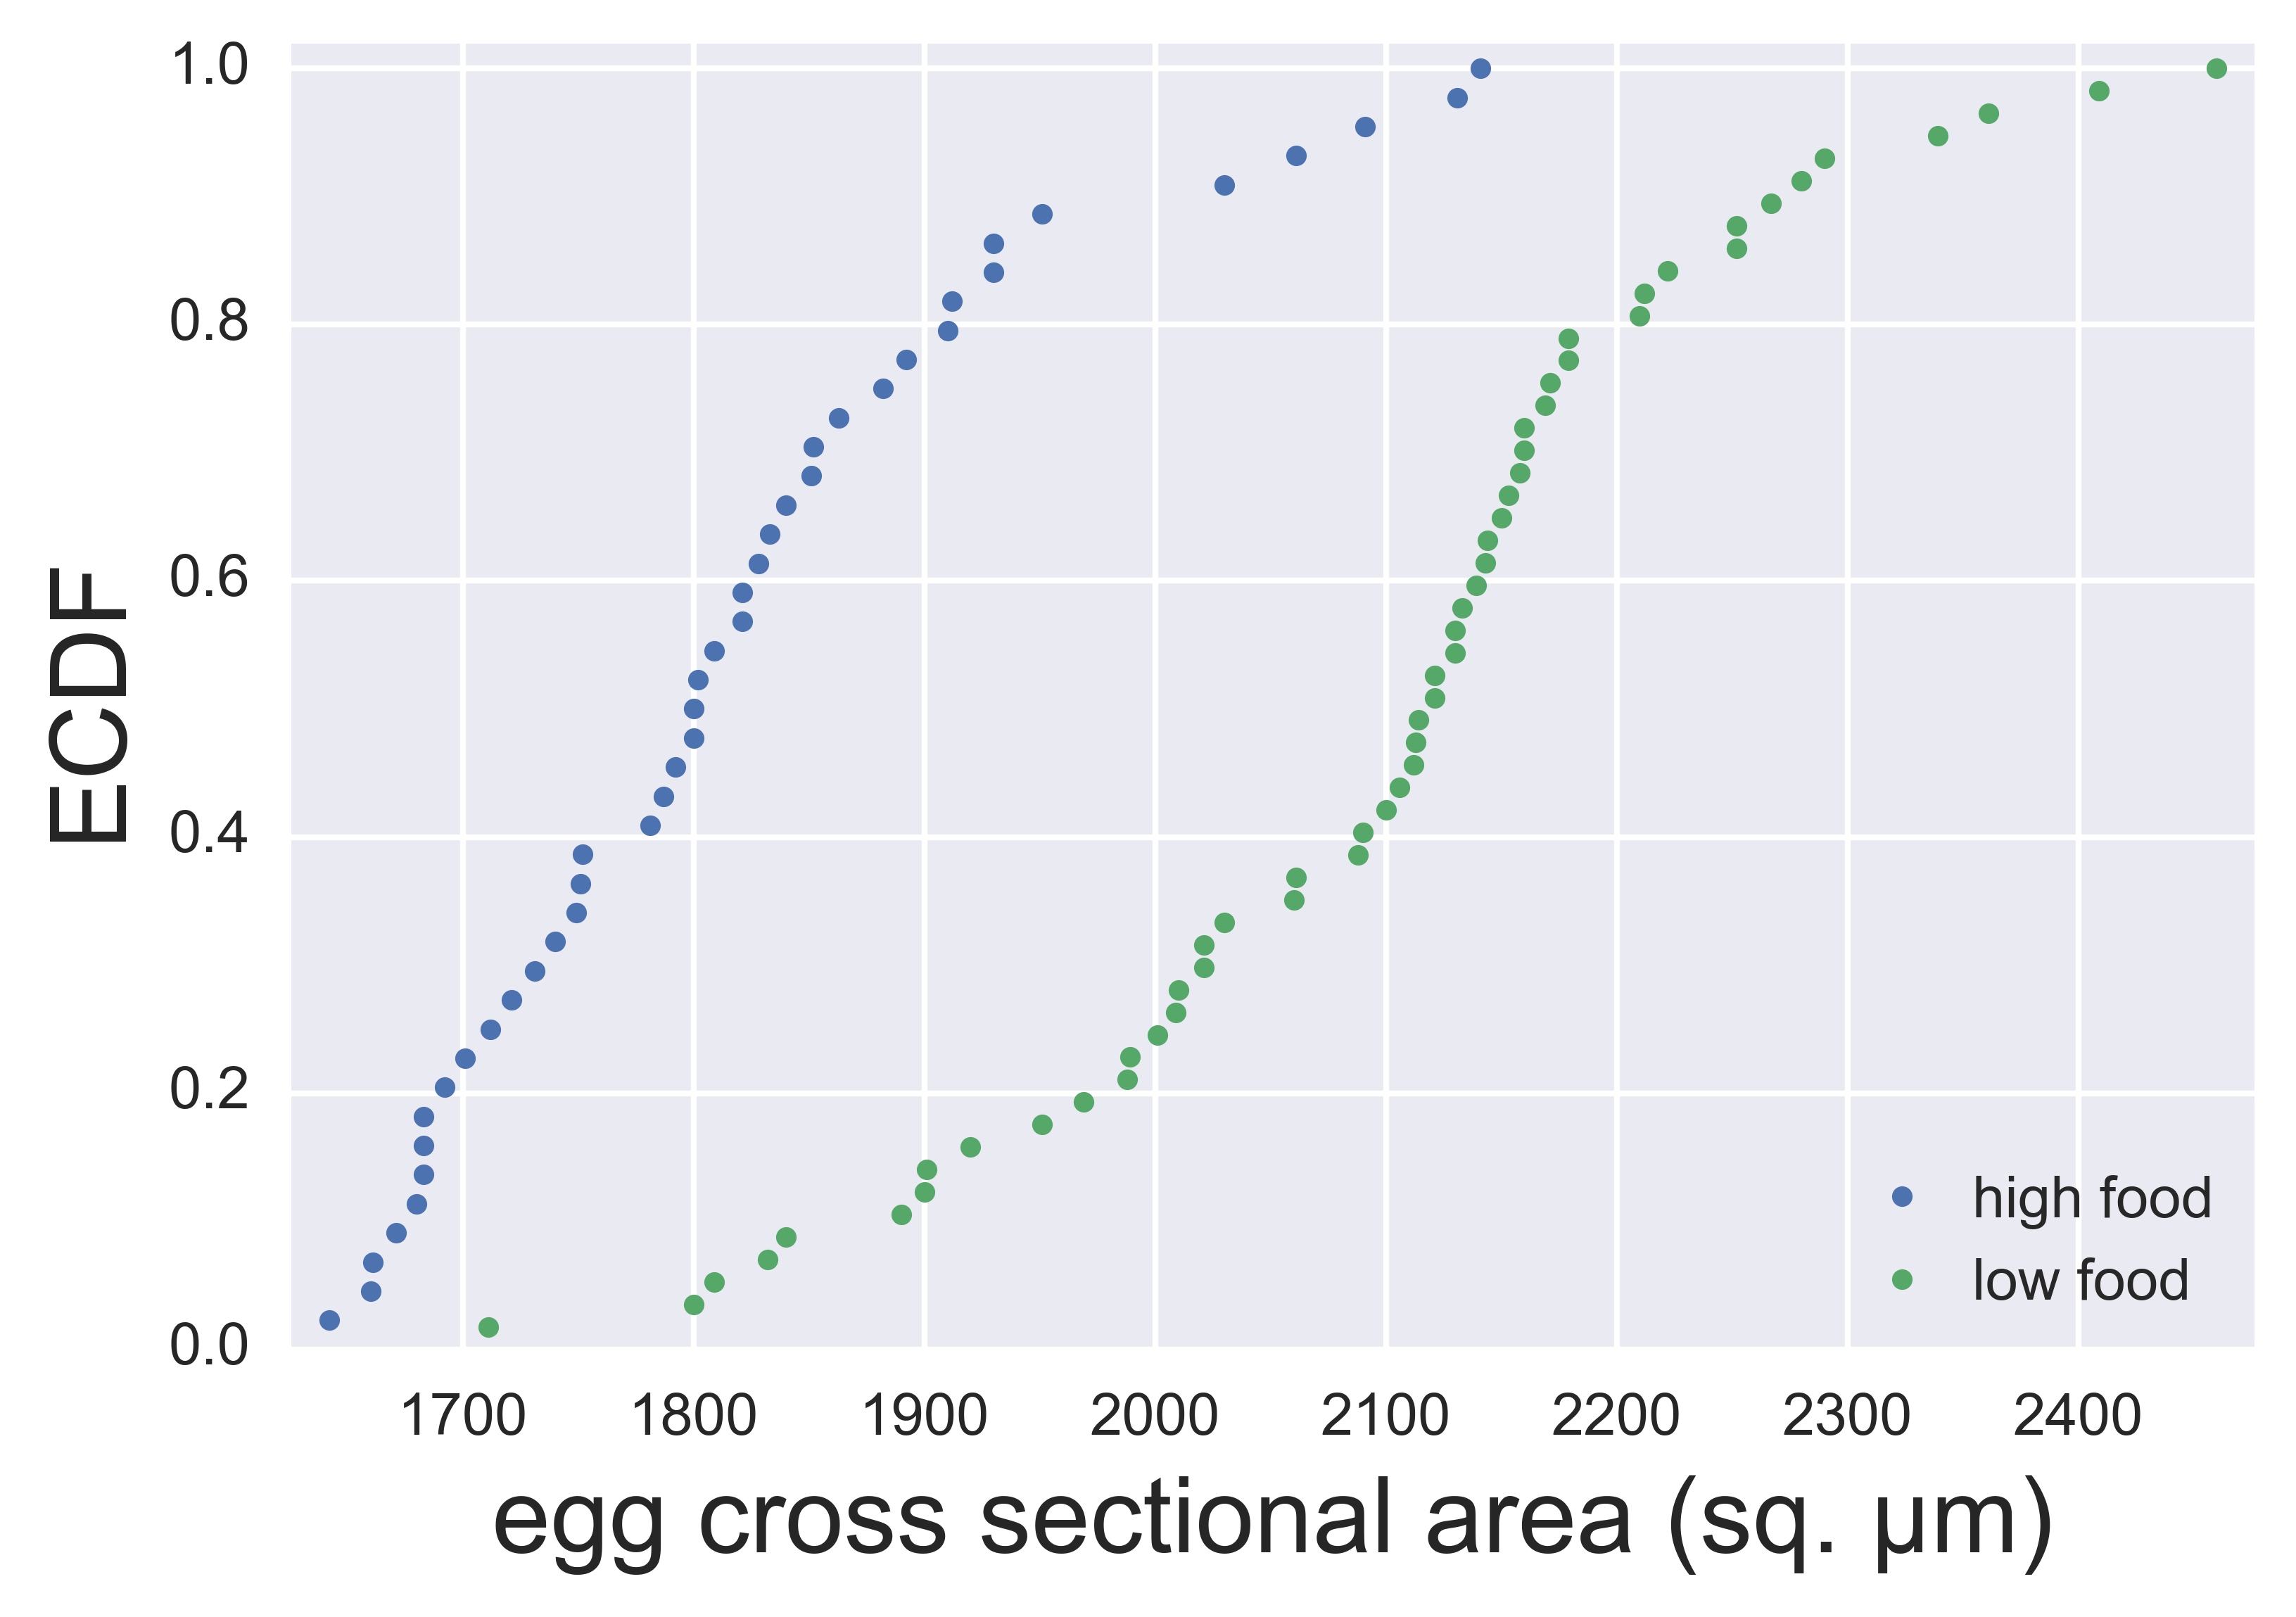

In [6]:
# 1. Function to compute ECDF
def ecdf(data):
    """Compute x, y values for an empirical distribution function."""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y
    
# 2. Load in the data sets
xa_high = np.loadtxt('data/xa_high_food.csv', comments='#')
xa_low = np.loadtxt('data/xa_low_food.csv', comments='#')

# 3. Generate ECDFS
x_high, y_high = ecdf(xa_high)
x_low, y_low = ecdf(xa_low)

# 4. Plot ECDFs
plt.plot(x_high, y_high, marker='.', linestyle='none')
plt.plot(x_low, y_low, marker='.', linestyle='none')
plt.margins(0.02)
plt.legend(('high food', 'low food'), loc='lower right')
plt.xlabel('egg cross sectional area (sq. µm)')
plt.ylabel('ECDF')

## Practice 4: Setting up the `bootcamp_utils` module

Speaking of your own work, hopefully what you will use some of the code you write here in bootcamp going forward. As such, set up a module, `bootcamp_utils` that contains some nice functions you write as you go through the bootcamp. We'll start with `ecdf()`.

>1. Use Atom to open the file `~/git/bootcamp/bootcamp_utils.py`.
2. Put an appropriate doc string at the top.
3. Import Numpy at the top. Later on, as you add more functions, you might need to include more imports.
4. Put your code for your `ecdf()` function in that file.
5. Save and close the file.
6. Use `git add` to put `bootcamp_utils.py` under version control.
7. Use `git commit` to commit it. Don't forget the `-m` flag and your commit message.
8. Use `git push origin master` to push your changes to the repository. Remember, you are working on your own fork, so there will be no conflicts with the upstream repository or with your classmates.

### Practice 4: solution

This is really an exercise in Git, so we do not put solutions here.

## Practice 5: Are they Normally distributed?

We might be interested to see if the egg cross-section data follow a Normal distribution. After all, this is commonly an underlying assumption when people report data from repeated measurements in the literature.

One way to assess this is to plot the theoretical CDF with the same mean and standard deviation as the data on top of the ECDFs. (There are better graphical ways to do this, but this is ok.)  We know the cumulative distribution function for a Normal distribution with mean $\mu$ and standard deviation $\sigma$ is

\begin{align}
\mathrm{cdf}(x) = \frac{1}{2}\left(1 + \mathrm{erf}\left(\frac{x - \mu}{\sqrt{2\sigma^2}}\right)\right),
\end{align}

but instead of coding this up directly, we can use the `scipy.stats` to do it for us!  We just need to supply where we want it evaluated ($x$), and the mean (the location parameter) and standard deviation (the scale parameter). Something like this:

In [7]:
# Make smooth x-values
x = np.linspace(1600, 2500, 400)

# Compute theoretical Normal distribution
cdf_theor = scipy.stats.norm.cdf(x, loc=np.mean(xa_low), scale=np.std(xa_low))

Now, let's make the plot.

>1. Regenerate your ECDFs. This time, import the `bootcamp_utils` module and call `bootcamp_utils.ecdf()` to get your `x` and `y` values.
2. Plot the ECDFs as dots, as before.
3. Make smooth curves of the Normal CDF using `scipy.stats.norm.cdf()`.
4. Plot those curves using `plt.plot()`. You can use the `color='black'` keyword argument to set the color of the smooth curves.
5. Don't forget to label your axes. You can also add a legend if you like.

## Practice 5: solution

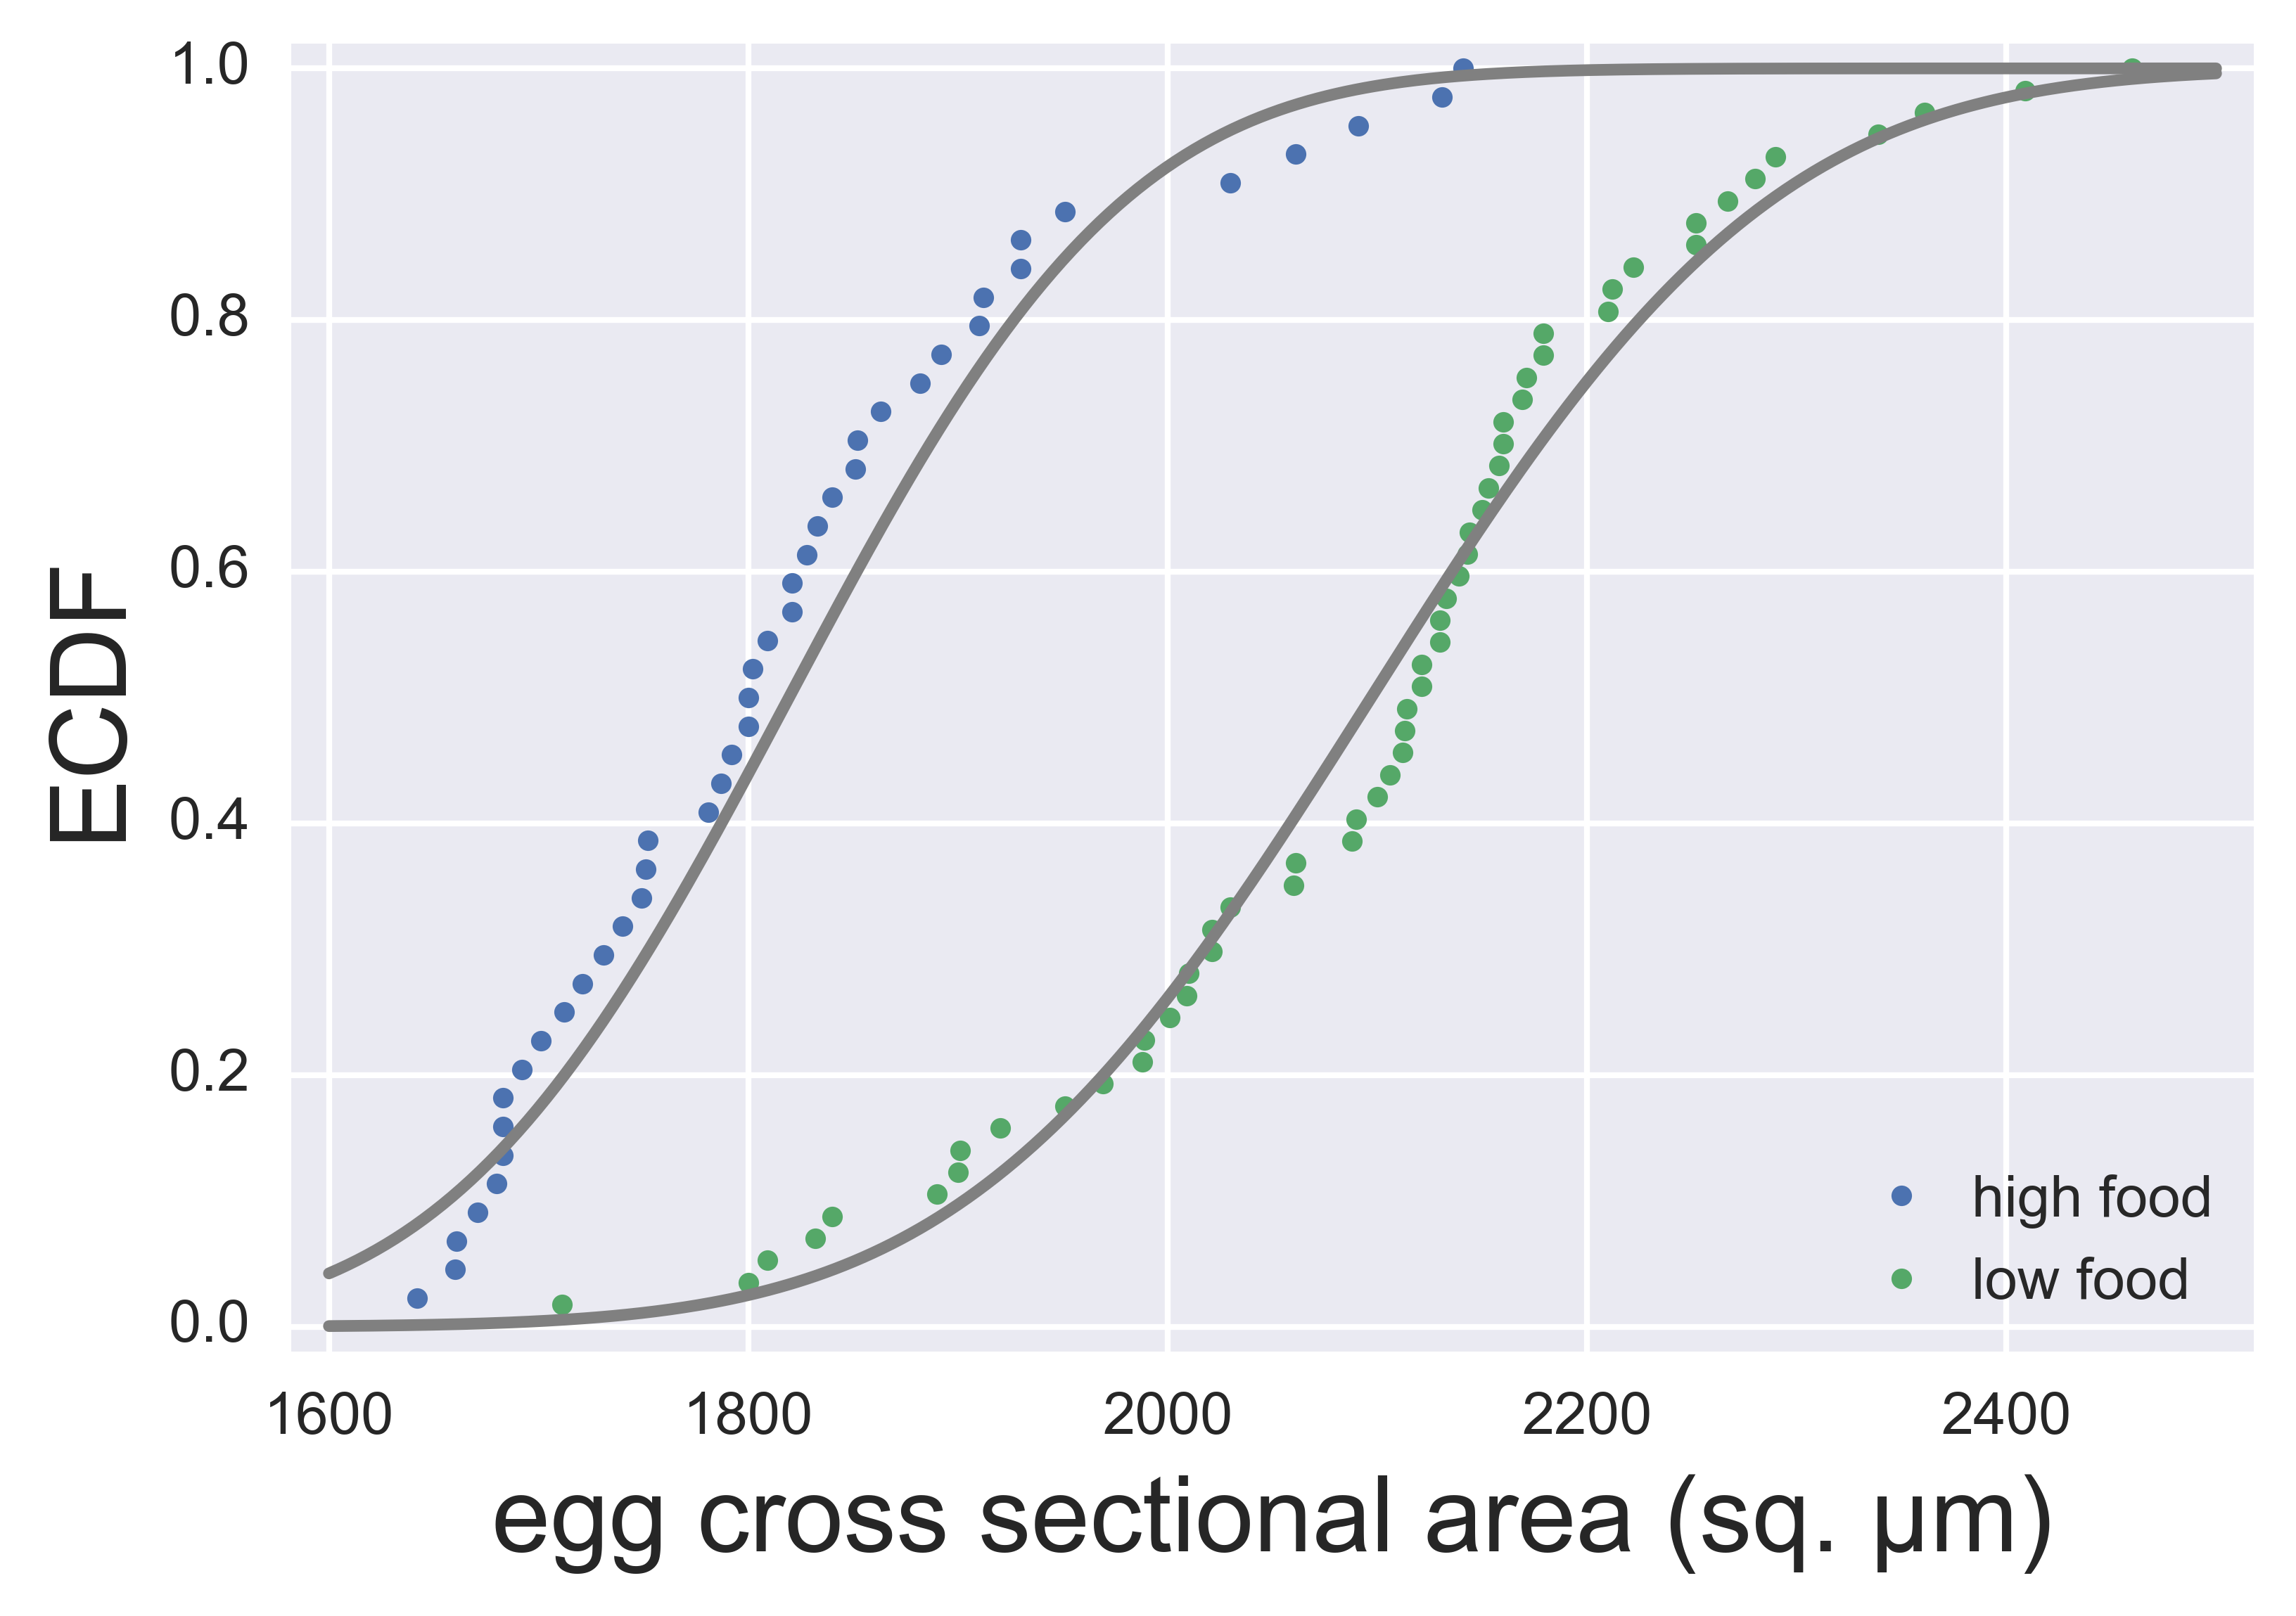

In [9]:
# 1. Generate ECDFs
import bootcamp_utils
x_high, y_high = bootcamp_utils.ecdf(xa_high)
x_low, y_low = bootcamp_utils.ecdf(xa_low)

# 2. Plot ECDFs
plt.plot(x_high, y_high, marker='.', linestyle='none')
plt.plot(x_low, y_low, marker='.', linestyle='none')
plt.margins(0.02)
plt.legend(('high food', 'low food'), loc='lower right')
plt.xlabel('egg cross sectional area (sq. µm)')
plt.ylabel('ECDF')

# 3. Make smooth curves
x = np.linspace(1600, 2500, 400)
cdf_high = scipy.stats.norm.cdf(x, loc=np.mean(xa_high), scale=np.std(xa_high))
cdf_low = scipy.stats.norm.cdf(x, loc=np.mean(xa_low), scale=np.std(xa_low))

# 4. Plot smooth curves in black
plt.plot(x, cdf_high, color='gray')
plt.plot(x, cdf_low, color='gray')

# 5. Label axes and add legend aready dine in part 2.

### A reminder about documentation

It is important to note that I didn't just memorize how all of these functions work when I wrote these practice exercises.  I looked at the online documentation.  For example, I looked at the [`plt.plot()` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), and the [`scipy.stats.norm` documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  To find those links, I just Googled "`plt.plot`" and "`scipy.stats`".

These packages are all very well documented, and those docs will be your guide.  You don't need to memorize (though you will eventually just by accident).